In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
import matplotlib.gridspec as gridspec
from matplotlib.collections import LineCollection
%matplotlib inline

In [45]:
def step(state, dt, box_bound):
    xy_new_true = state[ :2] + state[2: ] * dt  
    xy_new = xy_new_true + (np.random.randn(2) / 4)
    while(True):
        if xy_new[0] < box_bound[0]:
            x_over = abs(box_bound[0] - xy_new[0])
            xy_new[0] = box_bound[0] + x_over
            state[2] *= -1
        elif xy_new[0] > box_bound[1]:
            x_over = abs(box_bound[1] - xy_new[0])
            xy_new[0] = box_bound[1] - x_over
            state[2] *= -1
        elif xy_new[1] < box_bound[2]:
            y_over = abs(box_bound[2] - xy_new[1])
            xy_new[1] = box_bound[2] + y_over
            state[3] *= -1
        elif xy_new[1] > box_bound[3]:
            y_over = abs(box_bound[3] - xy_new[1])
            xy_new[1] = box_bound[3] - y_over
            state[3] *= -1
        else: 
            state[:2] = xy_new
            break
    
    return state

def compute_hidden(velocity):
    if velocity[0] > 0 and velocity[1] > 0:
        return 0
    if velocity[0] > 0 and velocity[1] < 0:
        return 1
    if velocity[0] < 0 and velocity[1] < 0:
        return 2
    if velocity[0] < 0 and velocity[1] > 0:
        return 3

def transition(A, old_hidden, new_hidden):
    A[old_hidden, new_hidden] += 1
    return A

def generate_data(T, dt, init_state):
    A = np.zeros((4,4))
    STATE = np.zeros((T+1, 4))
    box_bound = np.array([0, 25, 0, 25])

    # plot = figure(plot_width=300, plot_height=300)
    # plot.x_range = Range1d(box_bound[0], box_bound[1])
    # plot.y_range = Range1d(box_bound[2], box_bound[3])

    # c = plot.circle(x=[init_state[0]], y=[init_state[1]])
    # target = show(plot, notebook_handle=True)
    state = init_state
    STATE[0] = state
#     old_hidden = init_hidden(init_state[2:])
    for i in range(T):
        state = step(state, dt, box_bound)
#         print(state[2:])
        STATE[i+1] = state
        if i == 0:
            old_hidden = compute_hidden(state[2:])
        new_hidden = compute_hidden(state[2:])
        A = transition(A, old_hidden, new_hidden)
        old_hidden = new_hidden
        # c.data_source.data['x'] = [state[0]]
        # c.data_source.data['y'] = [state[1]]
        # push_notebook(handle=target)
        # time.sleep(0.2)
    Y = (STATE[1:] - STATE[:T])[:, :2]
    A = (A.T / A.sum(1)).T
    return Y, STATE, A

In [91]:
T = 150
dt = 1
x0 = 25*np.random.random()
y0 = 25*np.random.random()
vx = np.random.random()
vy = (1 - vx**2)**0.5
u  = 1
init_state = np.array([12, 19, u * vx,  u * vy])
# init_state = np.array([0,0,0.2,-0.1])

In [92]:
Y, Z, A = generate_data(T, dt, init_state)

tvx = np.concatenate([np.arange(T)[:,None], Y[:,0][:,None]], axis=1)
tvy = np.concatenate([np.arange(T)[:,None], Y[:,1][:,None]], axis=1)

vx_seg = np.concatenate([tvx[:-1, None], tvx[1:, None]], axis=1)
vy_seg = np.concatenate([tvy[:-1, None], tvy[1:, None]], axis=1)

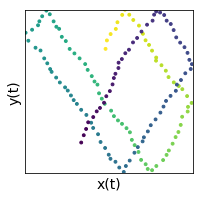

In [108]:
gs = gridspec.GridSpec(2,2)
fs = 3
fig1 = plt.figure(figsize=(fs,fs))
ax1 = fig1.gca()
s = [2*n/4 for n in range((Z).shape[0])]
ax1.scatter(Z[:,0],Z[:,1],s=8, c=T - np.arange(T+1))
ax1.set_xlim([0,25])
ax1.set_ylim([0,25])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('y(t)', fontsize=14)
ax1.set_xlabel('x(t)', fontsize=14)


fig1.savefig('trajectory_1_figsize=%f.svg' % fs)
fig1.savefig('trajectory_1_figsize=%f.pdf' % fs)
fig1.savefig('trajectory_1_figsize=%f.png' % fs, dpi=600)


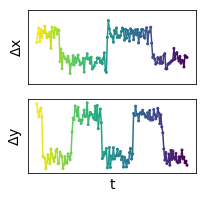

In [107]:
fig2, (ax2, ax3) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(fs, fs))

dx_lc = LineCollection(vx_seg)
dx_lc.set_array(T-2 - np.arange(T-1))
ax2.add_collection(dx_lc)
ax2.scatter(np.arange(T), Y[:,0], c=T-1 - np.arange(T), s=4)
#ax2.set_xlabel('t')
ax2.set_ylabel(r'$\Delta$x', fontsize=14)
ax2.set_xticks([])
ax2.set_yticks([])
dy_lc = LineCollection(vy_seg)
dy_lc.set_array(T-2 - np.arange(T-1))
ax3.add_collection(dy_lc)
ax3.scatter(np.arange(T), Y[:,1], c=T-1 - np.arange(T), s=4)
ax3.set_xlabel('t', fontsize=14)
ax3.set_ylabel(r'$\Delta$y', fontsize=14)
ax3.set_xticks([])
ax3.set_yticks([])
fig2.savefig('velocity_1_figsize=%f.svg' % fs)
fig2.savefig('velocity_1_figsize=%f.pdf' % fs)
fig2.savefig('velocity_1_figsize=%f.png' % fs, dpi=600)


In [143]:
v = np.random.random((100,2))
v_norm = ((v**2).sum(1))**0.5
v = v / v_norm[:, None]
v = v[v_norm < 1]
def plot_velocity_circle(v):
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    ax.scatter(v[:,0], v[:,1], label='z=1')
    ax.scatter(-v[:,0], v[:,1], label='z=2')
    ax.scatter(v[:,0], -v[:,1], label='z=3')
    ax.scatter(-v[:,0], -v[:,1], label='z=4')
    ax.set_xlabel('x velocity')
    ax.set_ylabel('y velocity')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)


In [11]:
v = np.random.random((100,2))
v_norm = ((v**2).sum(1))**0.5

In [206]:
Y

array([[ 0.49130651,  0.87098675],
       [ 0.49130651,  0.87098675],
       [ 0.49130651,  0.87098675],
       [ 0.49130651,  0.87098675],
       [ 0.49130651,  0.87098675],
       [ 0.49130651,  0.10328555],
       [ 0.49130651, -0.87098675],
       [ 0.49130651, -0.87098675],
       [ 0.49130651, -0.87098675],
       [ 0.49130651, -0.87098675],
       [ 0.49130651, -0.87098675],
       [ 0.49130651, -0.87098675],
       [ 0.49130651, -0.87098675],
       [ 0.49130651, -0.87098675],
       [ 0.49130651, -0.87098675],
       [ 0.49130651, -0.87098675],
       [ 0.49130651, -0.87098675],
       [ 0.49130651, -0.87098675],
       [ 0.49130651, -0.87098675],
       [ 0.49130651, -0.87098675],
       [ 0.49130651, -0.87098675],
       [ 0.49130651, -0.87098675],
       [-0.22826897, -0.87098675],
       [-0.49130651, -0.87098675],
       [-0.49130651, -0.87098675],
       [-0.49130651, -0.87098675],
       [-0.49130651, -0.87098675],
       [-0.49130651, -0.87098675],
       [-0.49130651,